In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [81]:
df=pd.read_csv("loan_approval_data.csv")

In [82]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [84]:
df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [85]:
df.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


# Handle Missing Values

In [86]:
categorical_cols=df.select_dtypes(include=["object"]).columns
numerical_cols=df.select_dtypes(include=["number"]).columns

In [87]:
categorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [88]:
numerical_cols

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [89]:
num_imp=SimpleImputer(strategy="mean")
df[numerical_cols]=num_imp.fit_transform(df[numerical_cols])

In [90]:
cat_imp=SimpleImputer(strategy="most_frequent")
df[categorical_cols]=cat_imp.fit_transform(df[categorical_cols])

In [91]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [92]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

# EDA-exploratory data analysis

Text(0.5, 1.0, 'Loan approved or not')

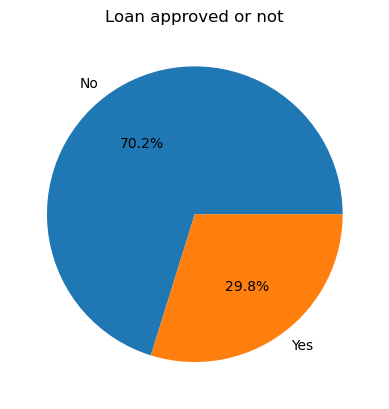

In [93]:
classes_count=df["Loan_Approved"].value_counts()
plt.pie(classes_count,labels=["No","Yes"],autopct="%1.1f%%")
plt.title("Loan approved or not")

[Text(0, 0, '621'), Text(0, 0, '379')]

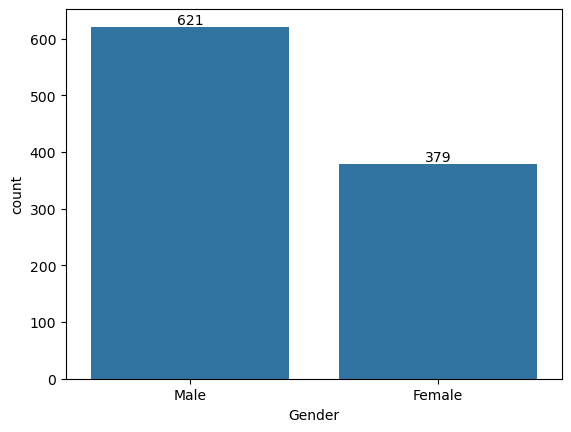

In [94]:
gender_count=df["Gender"].value_counts()
ax=sns.barplot(gender_count)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

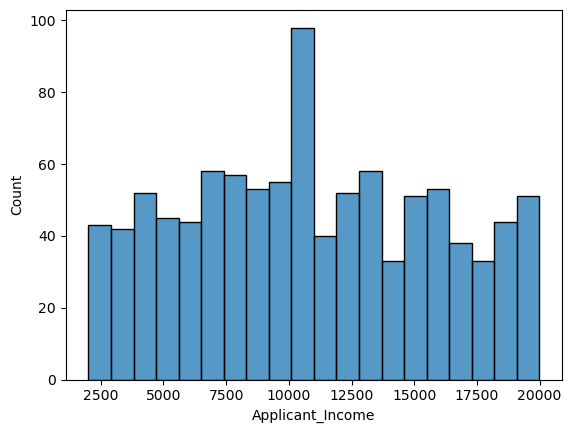

In [95]:
sns.histplot(
    data=df,
    x="Applicant_Income",
    bins=20
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

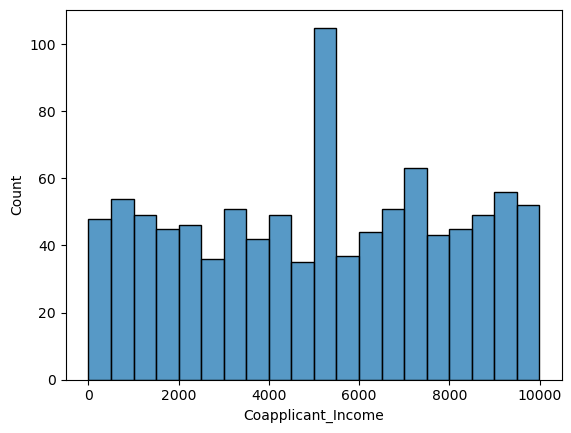

In [96]:
sns.histplot(
    data=df,
    x="Coapplicant_Income",
    bins=20
)

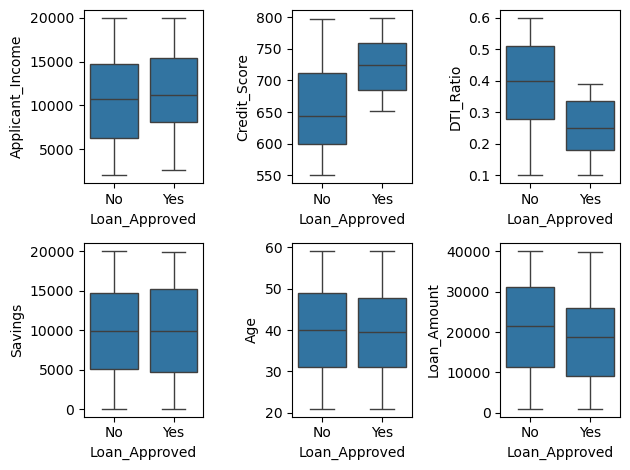

In [97]:
fig,axes=plt.subplots(2,3)
sns.boxplot(ax=axes[0,0],data=df,x="Loan_Approved",y="Applicant_Income")
sns.boxplot(ax=axes[0,1],data=df,x="Loan_Approved",y="Credit_Score")
sns.boxplot(ax=axes[0,2],data=df,x="Loan_Approved",y="DTI_Ratio")
sns.boxplot(ax=axes[1,0],data=df,x="Loan_Approved",y="Savings")
sns.boxplot(ax=axes[1,1],data=df,x="Loan_Approved",y="Age")
sns.boxplot(ax=axes[1,2],data=df,x="Loan_Approved",y="Loan_Amount")
plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

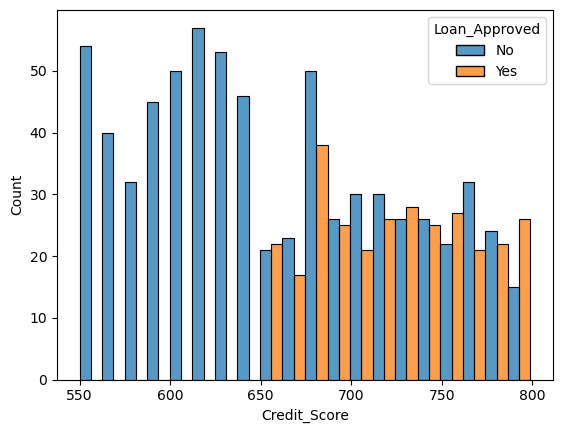

In [98]:
sns.histplot(
    data=df,
    x="Credit_Score",
    hue="Loan_Approved",
    bins=20,
    multiple="dodge"
)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

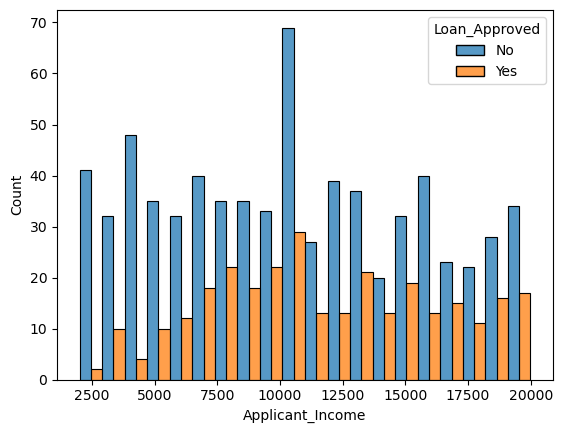

In [99]:
sns.histplot(
    data=df,
    x="Applicant_Income",
    hue="Loan_Approved",
    bins=20,
    multiple="dodge"
)

In [100]:
df = df.drop("Applicant_ID", axis=1)

In [101]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


# Feature Encoding

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    1000 non-null   float64
 1   Coapplicant_Income  1000 non-null   float64
 2   Employment_Status   1000 non-null   object 
 3   Age                 1000 non-null   float64
 4   Marital_Status      1000 non-null   object 
 5   Dependents          1000 non-null   float64
 6   Credit_Score        1000 non-null   float64
 7   Existing_Loans      1000 non-null   float64
 8   DTI_Ratio           1000 non-null   float64
 9   Savings             1000 non-null   float64
 10  Collateral_Value    1000 non-null   float64
 11  Loan_Amount         1000 non-null   float64
 12  Loan_Term           1000 non-null   float64
 13  Loan_Purpose        1000 non-null   object 
 14  Property_Area       1000 non-null   object 
 15  Education_Level     1000 non-null   object 
 16  Gender 

In [103]:
le=LabelEncoder()
df["Education_Level"]=le.fit_transform(df["Education_Level"])
df["Loan_Approved"]=le.fit_transform(df["Loan_Approved"])

In [104]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [105]:
cols=["Employment_Status","Marital_Status","Loan_Purpose","Property_Area","Gender","Employer_Category"]
ohe=OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore")
encoded=ohe.fit_transform(df[cols])
encoded_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(cols),index=df.index)
df=pd.concat([df.drop(columns=cols),encoded_df],axis=1)

In [106]:
df.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [107]:
df.shape

(1000, 28)

In [108]:
num_cols=df.select_dtypes(include="number")
corr_matrix=num_cols.corr()

In [109]:
num_cols.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed      -0.044464
Education_Level                 

<Axes: >

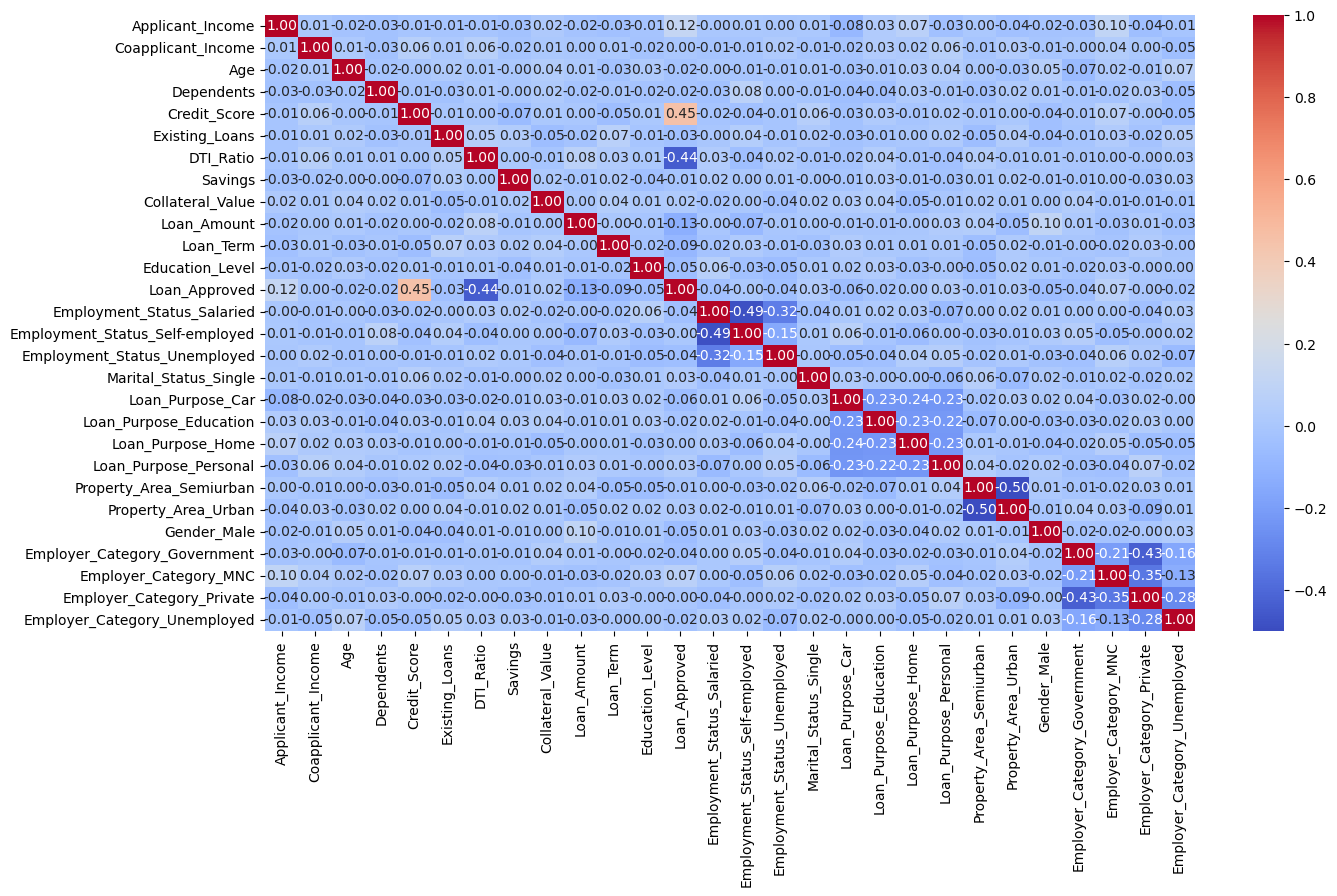

In [110]:
plt.figure(figsize=(15,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

# Train-Test-Split + Feature Scaling

In [111]:
X=df.drop("Loan_Approved",axis=1)
y=df["Loan_Approved"]

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [113]:
X_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
29,5890.000000,8041.0,31.000000,0.0,603.000000,0.000000,0.11,11906.0,8150.000000,29287.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
535,4779.000000,529.0,50.000000,0.0,614.000000,0.000000,0.21,5369.0,5430.000000,14786.000000,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
695,10852.571579,8927.0,36.000000,0.0,584.000000,4.000000,0.22,3186.0,24802.792632,20522.825263,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
557,2384.000000,2113.0,39.971579,1.0,726.000000,4.000000,0.34,11882.0,48542.000000,13312.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
836,5228.000000,5249.0,42.000000,1.0,676.033684,1.950526,0.18,17669.0,24802.792632,13906.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [114]:
X_test.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
521,13023.0,6675.0,53.000000,3.0,628.0,3.0,0.347263,10051.000000,26309.0,22947.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
737,15917.0,6787.0,42.000000,0.0,588.0,4.0,0.410000,922.000000,13476.0,20522.825263,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
740,7560.0,3530.0,52.000000,3.0,606.0,0.0,0.580000,9940.452632,21795.0,5876.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
660,19022.0,574.0,59.000000,0.0,725.0,4.0,0.410000,1463.000000,44498.0,8433.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
411,4967.0,5797.0,39.971579,3.0,697.0,4.0,0.580000,1095.000000,3017.0,33926.000000,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [115]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [116]:
X_train_scaled

array([[-1.01234556e+00,  1.02716377e+00, -8.22511453e-01, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.23639141e+00, -1.59187898e+00,  9.15886794e-01, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.15862490e-02,  1.33606578e+00, -3.65038230e-01, ...,
        -4.13887756e-01,  1.16316000e+00, -3.07231582e-01],
       ...,
       [-2.27277589e-01,  3.50089621e-01, -8.22511453e-01, ...,
        -4.13887756e-01,  1.16316000e+00, -3.07231582e-01],
       [ 1.12970221e+00, -4.64700438e-01,  1.19037073e+00, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.75526629e+00,  1.43417276e-02,  9.40348249e-04, ...,
         2.41611400e+00, -8.59726954e-01, -3.07231582e-01]],
      shape=(800, 27))

In [117]:
X_test_scaled

array([[ 0.42610546,  0.55091079,  1.19037073, ..., -0.41388776,
         1.16316   , -0.30723158],
       [ 1.00971366,  0.58995935,  0.18392964, ..., -0.41388776,
         1.16316   , -0.30723158],
       [-0.67557096, -0.54558674,  1.09887608, ..., -0.41388776,
         1.16316   , -0.30723158],
       ...,
       [-0.67980585, -0.10106072,  1.28186537, ..., -0.41388776,
         1.16316   , -0.30723158],
       [-0.37650705, -0.97825874, -0.54802752, ..., -0.41388776,
        -0.85972695, -0.30723158],
       [-0.73647272, -1.24497436,  0.73289751, ..., -0.41388776,
         1.16316   , -0.30723158]], shape=(200, 27))

# Train & Evaluate Models

In [118]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
log_model=LogisticRegression()
log_model.fit(X_train_scaled,y_train)

y_pred=log_model.predict(X_test_scaled)

#Evaluation
print("For Logisctic Regression ")
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))

For Logisctic Regression 
Precision:  0.7833333333333333
Recall:  0.7704918032786885
F1 Score:  0.7768595041322314
Accuracy Score:  0.865
Confusion Matrix:  [[126  13]
 [ 14  47]]


In [119]:
#kNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled,y_train)

y_pred=knn_classifier.predict(X_test_scaled)

#Evaluation
print("kNN Classifier Model")
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))

kNN Classifier Model
Precision:  0.6274509803921569
Recall:  0.5245901639344263
F1 Score:  0.5714285714285714
Accuracy Score:  0.76
Confusion Matrix:  [[120  19]
 [ 29  32]]


In [120]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()

nb_model.fit(X_train_scaled,y_train)

y_pred=nb_model.predict(X_test_scaled)

#Evaluation
print("Naive Bayes Model")
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))

Naive Bayes Model
Precision:  0.8035714285714286
Recall:  0.7377049180327869
F1 Score:  0.7692307692307693
Accuracy Score:  0.865
Confusion Matrix:  [[128  11]
 [ 16  45]]


# Till now Best Model on the basis of Precision => Naive Bayes

# Feature Engineering

In [130]:
df["DTI_Ratio_sq"]=df["DTI_Ratio"]**2
df["Credit_Score_sq"]=df["Credit_Score"]**2
df["Applicant_Income_log"]=np.log1p(df["Applicant_Income"])
X=df.drop(columns=["Loan_Approved","Credit_Score","DTI_Ratio","Applicant_Income"],axis=1)
y=df["Loan_Approved"]

#Train Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [131]:
X_train.head()

,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,Employment_Status_Salaried,...,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,DTI_Ratio_sq,Credit_Score_sq,Applicant_Income_log
29,8041.0,31.000000,0.0,0.000000,11906.0,8150.000000,29287.000000,12.0,1,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0121,363609.000000,8.681181
535,529.0,50.000000,0.0,0.000000,5369.0,5430.000000,14786.000000,72.0,1,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0441,376996.000000,8.472196
695,8927.0,36.000000,0.0,4.000000,3186.0,24802.792632,20522.825263,48.0,1,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0484,341056.000000,9.292249
557,2113.0,39.971579,1.0,4.000000,11882.0,48542.000000,13312.000000,24.0,0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.1156,527076.000000,7.776954
836,5249.0,42.000000,1.0,1.950526,17669.0,24802.792632,13906.000000,84.0,0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0324,457021.542187,8.561975


In [132]:
X_test.head()

,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,Employment_Status_Salaried,...,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,DTI_Ratio_sq,Credit_Score_sq,Applicant_Income_log
521,6675.0,53.000000,3.0,3.0,10051.000000,26309.0,22947.000000,48.0,1,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.120592,394384.0,9.474549
737,6787.0,42.000000,0.0,4.0,922.000000,13476.0,20522.825263,60.0,0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.168100,345744.0,9.675206
740,3530.0,52.000000,3.0,0.0,9940.452632,21795.0,5876.000000,48.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.336400,367236.0,8.930759
660,574.0,59.000000,0.0,4.0,1463.000000,44498.0,8433.000000,72.0,0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.168100,525625.0,9.853404
411,5797.0,39.971579,3.0,4.0,1095.000000,3017.0,33926.000000,36.0,1,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.336400,485809.0,8.510773


In [133]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
log_model=LogisticRegression()
log_model.fit(X_train_scaled,y_train)

y_pred=log_model.predict(X_test_scaled)

#Evaluation
print("For Logisctic Regression ")
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))

For Logisctic Regression 
Precision:  0.7777777777777778
Recall:  0.8032786885245902
F1 Score:  0.7903225806451613
Accuracy Score:  0.87
Confusion Matrix:  [[125  14]
 [ 12  49]]


In [134]:
#kNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled,y_train)

y_pred=knn_classifier.predict(X_test_scaled)

#Evaluation
print("kNN Classifier Model")
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))

kNN Classifier Model
Precision:  0.6296296296296297
Recall:  0.5573770491803278
F1 Score:  0.591304347826087
Accuracy Score:  0.765
Confusion Matrix:  [[119  20]
 [ 27  34]]


In [135]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()

nb_model.fit(X_train_scaled,y_train)

y_pred=nb_model.predict(X_test_scaled)

#Evaluation
print("Naive Bayes Model")
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))

Naive Bayes Model
Precision:  0.8035714285714286
Recall:  0.7377049180327869
F1 Score:  0.7692307692307693
Accuracy Score:  0.865
Confusion Matrix:  [[128  11]
 [ 16  45]]
